**#Ejercicio de lab**

In [30]:
#Importación de librerias a usarse
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Carga de datos para procesamiento

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# Leer datos separados por una coma
#data = pd.read_csv('/content/drive/MyDrive/sis420/machine_learning/datasets/Spotify_Youtube_Dataset.csv')
data = pd.read_csv('Spotify_Youtube_Dataset.csv')
data = data.head(10000)

x = data['Likes'].values
y = data['Comments'].values


m = y.size  # m = numero de ejemplos de entrenamiento
mask = ~np.isnan(x) & ~np.isnan(y)  # filas válidas
x = x[mask]
y = y[mask]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
print(x[:50])
print(y[:50])
print(m)

[6.2208960e+06 1.0791280e+06 2.8214200e+05 1.7885770e+06 6.1973180e+06
 1.8446580e+06 1.1686000e+04 1.7675000e+04 7.3952700e+05 1.3869200e+06
 4.3944710e+06 1.2135720e+06 1.7402240e+06 1.8909000e+06 3.1403560e+06
 1.2722660e+06 1.4566220e+06 7.8471700e+05 4.3483700e+05 2.0941820e+06
 1.0481678e+07 5.0145270e+06 2.5233120e+06 3.3347100e+06 2.7658870e+06
 3.8279100e+05 2.7591990e+06 2.4593500e+05 6.1200000e+02 5.7290000e+03
 2.8287950e+06 5.1275990e+06 2.9340900e+05 4.2979700e+05 1.7816900e+06
 1.8000000e+01 2.7410600e+05 4.7375100e+05 4.1812400e+05 2.1710900e+05
 4.6009330e+06 4.3704610e+06 7.8734300e+05 1.0282499e+07 5.5327870e+06
 3.7413000e+06 8.4972240e+06 1.3515772e+07 8.8675470e+06 2.9620290e+06]
[1.69907e+05 3.10030e+04 7.39900e+03 5.52290e+04 1.55930e+05 7.20080e+04
 2.41000e+02 2.60000e+02 2.02960e+04 3.92400e+04 1.21452e+05 3.27610e+04
 3.25730e+04 3.70690e+04 6.00910e+04 3.70040e+04 4.94610e+04 2.00840e+04
 1.60290e+04 5.65160e+04 2.96745e+05 1.13251e+05 4.20750e+04 6.05520e+

Grafica de los datos

In [33]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.
    fig = pyplot.figure()  # abre una nueva figura
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Streams')
    pyplot.xlabel('Comments')


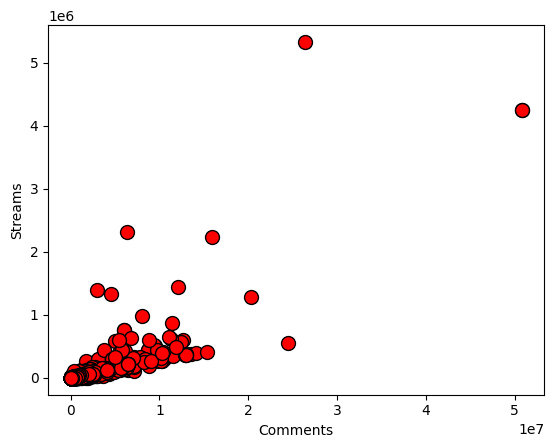

In [34]:
plotData(x,y)

[ 4.2280681   0.46727376 -0.11565811 ... -0.23433035 -0.23168407
 -0.26457751]


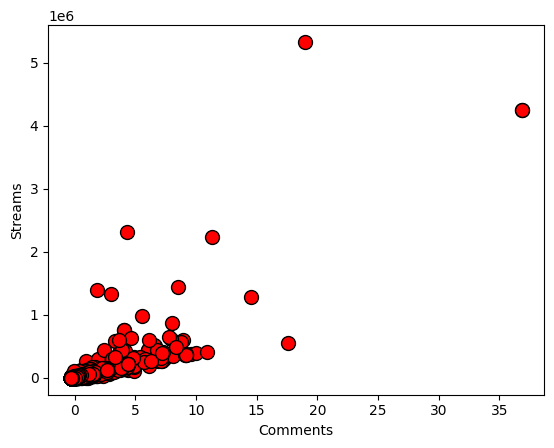

In [35]:
x_mean = np.mean(x)
x_std = np.std(x)
x = (x - x_mean) / x_std
print(x)
plotData(x,y)

# Implementación del descenso por el gradiente

In [36]:
x = np.c_[np.ones(x.shape[0]), x]
print(x[:50])

[[ 1.00000000e+00  4.22806810e+00]
 [ 1.00000000e+00  4.67273759e-01]
 [ 1.00000000e+00 -1.15658111e-01]
 [ 1.00000000e+00  9.86179276e-01]
 [ 1.00000000e+00  4.21082266e+00]
 [ 1.00000000e+00  1.02719807e+00]
 [ 1.00000000e+00 -3.13475164e-01]
 [ 1.00000000e+00 -3.09094687e-01]
 [ 1.00000000e+00  2.18882638e-01]
 [ 1.00000000e+00  6.92399126e-01]
 [ 1.00000000e+00  2.89218347e+00]
 [ 1.00000000e+00  5.65608852e-01]
 [ 1.00000000e+00  9.50812902e-01]
 [ 1.00000000e+00  1.06102041e+00]
 [ 1.00000000e+00  1.97489810e+00]
 [ 1.00000000e+00  6.08538845e-01]
 [ 1.00000000e+00  7.43380596e-01]
 [ 1.00000000e+00  2.51935529e-01]
 [ 1.00000000e+00 -3.97386339e-03]
 [ 1.00000000e+00  1.20970503e+00]
 [ 1.00000000e+00  7.34449124e+00]
 [ 1.00000000e+00  3.34570512e+00]
 [ 1.00000000e+00  1.52357949e+00]
 [ 1.00000000e+00  2.11705259e+00]
 [ 1.00000000e+00  1.70100381e+00]
 [ 1.00000000e+00 -4.20413729e-02]
 [ 1.00000000e+00  1.69611207e+00]
 [ 1.00000000e+00 -1.42140652e-01]
 [ 1.00000000e+00 -3

Calculo del costo J

In [37]:
def calcularCosto(x, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    #h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(x, theta) - y))
    return J

Descenso por el gradiente

In [38]:
def gradientDescent(x, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(x, theta) - y).dot(x)
        # save the cost J in every iteration
        J_history.append(calcularCosto(x, y, theta))

    return theta, J_history

inicialización y prueba

In [39]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 50000
alpha = 0.001

theta, J_history = gradientDescent(x ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(J_history)

Theta encontrada por descenso gradiente: 17025.9981, 82299.2332
[np.float64(5376258651.275934), np.float64(5369213246.368943), np.float64(5362181925.226358), np.float64(5355164659.69474), np.float64(5348161421.676919), np.float64(5341172183.131895), np.float64(5334196916.074722), np.float64(5327235592.576399), np.float64(5320288184.763748), np.float64(5313354664.819313), np.float64(5306435004.981248), np.float64(5299529177.5432), np.float64(5292637154.854198), np.float64(5285758909.318555), np.float64(5278894413.395734), np.float64(5272043639.600265), np.float64(5265206560.501613), np.float64(5258383148.724079), np.float64(5251573376.946688), np.float64(5244777217.90308), np.float64(5237994644.3814), np.float64(5231225629.224191), np.float64(5224470145.3282795), np.float64(5217728165.644677), np.float64(5210999663.178462), np.float64(5204284610.988677), np.float64(5197582982.188219), np.float64(5190894749.943732), np.float64(5184219887.475503), np.float64(5177558368.057349), np.float64

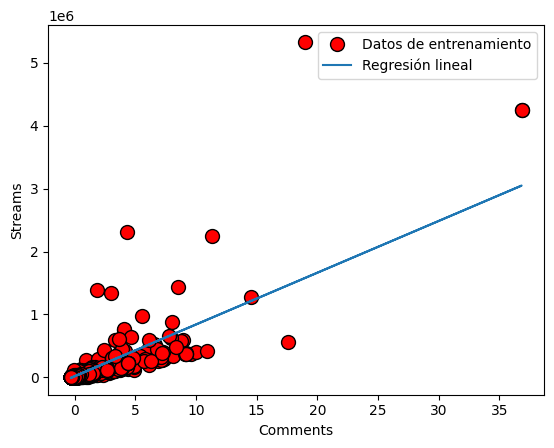

In [40]:
# grafica la linea de ajuste
plotData(x[:, 1], y)
pyplot.plot(x[:, 1], np.dot(x, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal']);

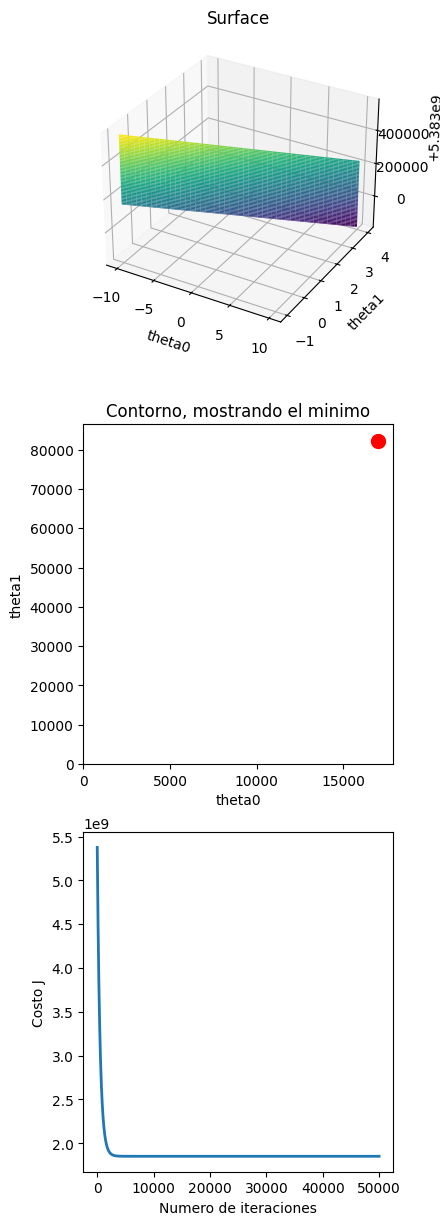

In [41]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(x, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass